In [1]:
import numpy as np
import networkx as nx
from mat4py import loadmat
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [923]:
def diffEfficiency (A):
    
    def Uij(A):
        S=[]
        for i in range (0, len(A)):
            s=0
            for j in range (0, len(A)):
                s+=A[i][j]
            S.append(s)
        S_1=np.linalg.inv(np.diag(S))
        U=np.linalg.multi_dot([A, S_1])
        return U
    
    norm=1/(len(A)*(len(A)-1))
    D=0
    for j in range(0,len(A)):
        U=Uij(A)
        U[j]=[0 for i in U[j]]
        U=1/(1-U)
        for i in range (0, len(A)):
            if i!=j:
                x=0
                for n in range (0, len(A)):
                    x+=U[n][i]
                if x!=0:
                    D+=1/x
    return D*norm

In [924]:
data = loadmat('brainGraph1.mat') #load your data here
A_B1 = np.array(list(data.values()))[0]
data = loadmat('brainGraph2.mat')
A_B2 = np.array(list(data.values()))[0]

In [925]:
def threshold(A, n):
    #gives thresholded graph given adjacency matrix (A) and threshold values (n) 
    aThreshold=np.zeros([len(A), len(A)])
    for i in range(0, len(A)):
        for j in range(0, len(A)):
            if A[i][j]<n:
                aThreshold[i][j]=0
            else:
                aThreshold[i][j]=A[i][j]
    return aThreshold  

In [926]:
def globalEfficiencyFast (A):
    G=nx.from_numpy_array(A)
    norm=1/(len(G.nodes)*(len(G.nodes)-1))
    lij=dict(nx.all_pairs_dijkstra_path_length(G, weight="weight"))
    gEff=0
    for i in G.nodes:
        for j in range (0,len(lij[i])):
            if np.array(list(lij[i].values()))[j] != 0:
                gEff+=(1/np.array(list(lij[i].values()))[j])
    return gEff*norm

In [927]:
import time
start_time = time.time()
GE_Fast=globalEfficiencyFast(A_B1)
print("--- %s seconds ---" % (time.time() - start_time), 'global_efficiency=', GE_Fast)

--- 0.9344997406005859 seconds --- global_efficiency= 59.09230732440917


In [928]:
import time
start_time = time.time()
GE=globalEfficiency(A_B1)
print("--- %s seconds ---" % (time.time() - start_time), 'global_efficiency=', GE)

--- 277.4519441127777 seconds --- global_efficiency= 59.09230732440916


In [929]:
columns=["Global_Efficiency", "Threshold"]
index=[i for i in np.arange(0, 1, 0.1)]
GE_B1=pd.DataFrame(columns=columns, index=index)
for i in range (0,10):
    GE_B1.iloc[i,0]=globalEfficiencyFast(threshold(A_B1,GE_B1.index[i])) # here, one can replace globalEfficencyFast function with globalEfficiency function defined in 2.1
    GE_B1.iloc[i,1]=GE_B1.index[i]
GE_B2=pd.DataFrame(columns=columns, index=index)
for i in range (0,10):
    GE_B2.iloc[i,0]=globalEfficiencyFast(threshold(A_B2,GE_B2.index[i])) # here, one can replace globalEfficencyFast function with globalEfficiency function defined in 2.1
    GE_B2.iloc[i,1]=GE_B2.index[i]

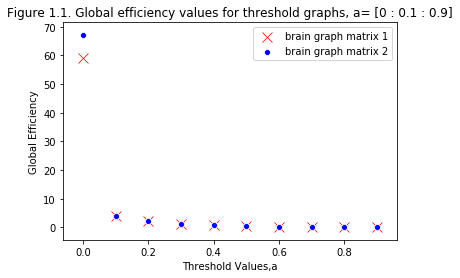

In [941]:
ax=sns.scatterplot(data=GE_B1, x="Threshold", y="Global_Efficiency", color="red", marker='x', s=100, label= 'brain graph matrix 1')
ax=sns.scatterplot(data=GE_B2, x="Threshold", y="Global_Efficiency", color="blue", label= 'brain graph matrix 2')
ax.legend()
plt.ylabel('Global Efficiency')
plt.xlabel('Threshold Values,a')
plt.title('Figure 1.1. Global efficiency values for threshold graphs, a= [0 : 0.1 : 0.9]')
plt.show()

Since the global efficiency value of brain graph matrix without any threshold can be seen kind outliers to the thresholded brain graphs, in order to see the difference in a more clear way, I also plot the global efficiency values by discarding the global efficiency values for the unthresholded graphs 

In [937]:
columns=["Global_Efficiency", "Threshold"]
index=[i for i in np.arange(0.1, 1, 0.1)]
GE2_B1=pd.DataFrame(columns=columns, index=index)
for i in range (0,9):
    GE2_B1.iloc[i,0]=globalEfficiencyFast(threshold(A_B1,GE2_B1.index[i]))
    GE2_B1.iloc[i,1]=GE2_B1.index[i]
GE2_B2=pd.DataFrame(columns=columns, index=index)
for i in range (0,9):
    GE2_B2.iloc[i,0]=globalEfficiencyFast(threshold(A_B2,GE2_B2.index[i]))
    GE2_B2.iloc[i,1]=GE2_B2.index[i]

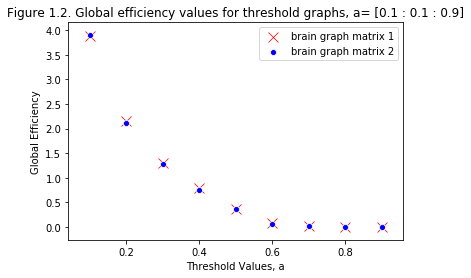

In [942]:
ax=sns.scatterplot(data=GE2_B1, x="Threshold", y="Global_Efficiency", color="red", s=100, marker='x', label= 'brain graph matrix 1')
ax=sns.scatterplot(data=GE2_B2, x="Threshold", y="Global_Efficiency", color="blue", label= 'brain graph matrix 2')
ax.legend()
plt.ylabel('Global Efficiency')
plt.xlabel('Threshold Values, a')
plt.title('Figure 1.2. Global efficiency values for threshold graphs, a= [0.1 : 0.1 : 0.9]')
plt.show()

In [940]:
columns=["Diffusion_Efficiency", "Threshold"]
index=[i for i in np.arange(0, 1, 0.1)]
DE_B1=pd.DataFrame(columns=columns, index=index)
for i in range (0,10):
    DE_B1.iloc[i,0]=diffEfficiency(threshold(A_B1,DE_B1.index[i]))
    DE_B1.iloc[i,1]=DE_B1.index[i]
DE_B2=pd.DataFrame(columns=columns, index=index)
for i in range (0,10):
    DE_B2.iloc[i,0]=diffEfficiency(threshold(A_B2,DE_B2.index[i]))
    DE_B2.iloc[i,1]=DE_B2.index[i]

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


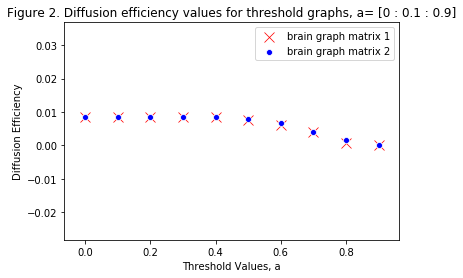

In [944]:
ax=sns.scatterplot(data=DE_B1, x="Threshold", y="Diffusion_Efficiency", color="red", marker='x', s=100, label= 'brain graph matrix 1')
ax=sns.scatterplot(data=DE_B2, x="Threshold", y="Diffusion_Efficiency", color="blue", label= 'brain graph matrix 2')
ax.legend()
plt.ylabel('Diffusion Efficiency')
plt.xlabel('Threshold Values, a')
plt.title('Figure 2. Diffusion efficiency values for threshold graphs, a= [0 : 0.1 : 0.9]')
plt.show()

In [945]:
GE_B1["Diffusion_Efficiency"]=DE_B1["Diffusion_Efficiency"]
GE_B2["Diffusion_Efficiency"]=DE_B2["Diffusion_Efficiency"]

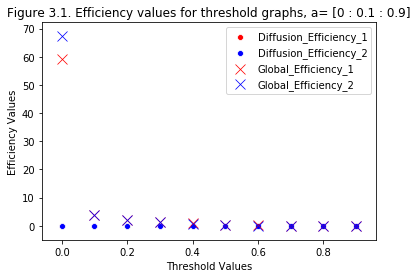

In [947]:
ax=sns.scatterplot(data=GE_B1, x="Threshold", y="Diffusion_Efficiency", color="red", label= 'Diffusion_Efficiency_1')
ax=sns.scatterplot(data=GE_B2, x="Threshold", y="Diffusion_Efficiency", color="blue", label= 'Diffusion_Efficiency_2')
ax=sns.scatterplot(data=GE_B1, x="Threshold", y="Global_Efficiency", color="red", marker='x', s=100 , label= 'Global_Efficiency_1')
ax=sns.scatterplot(data=GE_B2, x="Threshold", y="Global_Efficiency", color="blue", marker='x', s=100, label= 'Global_Efficiency_2')
ax.legend()
plt.ylabel('Efficiency Values')
plt.xlabel('Threshold Values')
plt.title('Figure 3.1. Efficiency values for threshold graphs, a= [0 : 0.1 : 0.9]')
plt.show()

In [948]:
GE2_B1["Diffusion_Efficiency"]=DE_B1["Diffusion_Efficiency"]
GE2_B2["Diffusion_Efficiency"]=DE_B2["Diffusion_Efficiency"]

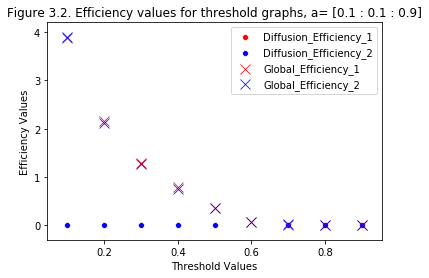

In [949]:
ax=sns.scatterplot(data=GE2_B1, x="Threshold", y="Diffusion_Efficiency", color="red", label= 'Diffusion_Efficiency_1')
ax=sns.scatterplot(data=GE2_B2, x="Threshold", y="Diffusion_Efficiency", color="blue", label= 'Diffusion_Efficiency_2')
ax=sns.scatterplot(data=GE2_B1, x="Threshold", y="Global_Efficiency", color="red", marker='x', s=100 , label= 'Global_Efficiency_1')
ax=sns.scatterplot(data=GE2_B2, x="Threshold", y="Global_Efficiency", color="blue", marker='x', s=100, label= 'Global_Efficiency_2')
ax.legend()
plt.ylabel('Efficiency Values')
plt.xlabel('Threshold Values')
plt.title('Figure 3.2. Efficiency values for threshold graphs, a= [0.1 : 0.1 : 0.9]')
plt.show()

From plots given through Figure 1.1, 1.2, 2, 3.1, and 3.2, one can provide following comments:

By thresholding given graphs according to the their weighted adjacency matrix, as it is expected, global efficiency values has decreased since the shorter edges are removed one by one results to have longer shortest distance between nodes.

It is seen from both global efficiency and diffusion efficiency results, after theshold value 0.5, the communication within the graphs has damaged significantly. 

Thresholding the graphs hasn't affect too much the diffusion efficiency before a certain value, 0.5.

Since global efficiency values have decreased significantly after thresholding for 0.1, it can be concluded that majority of the edges have 0.1 weights in both brain graph 1 and brain graph 2, where it is a bit much more in brain graph 1.  

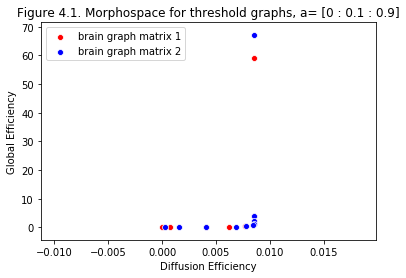

In [950]:
ax=sns.scatterplot(data=GE_B1, x="Diffusion_Efficiency", y="Global_Efficiency", color="red", label= 'brain graph matrix 1')
ax=sns.scatterplot(data=GE_B2, x="Diffusion_Efficiency", y="Global_Efficiency", color="blue", label= 'brain graph matrix 2')
plt.ylabel('Global Efficiency')
plt.xlabel('Diffusion Efficiency')
plt.title('Figure 4.1. Morphospace for threshold graphs, a= [0 : 0.1 : 0.9]')
plt.show()

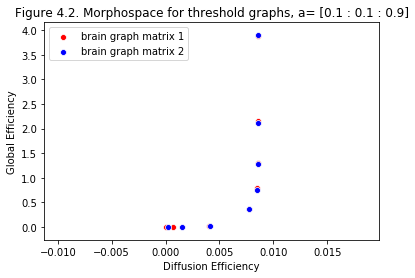

In [951]:
ax=sns.scatterplot(data=GE2_B1, x="Diffusion_Efficiency", y="Global_Efficiency", color="red", label= 'brain graph matrix 1')
ax=sns.scatterplot(data=GE2_B2, x="Diffusion_Efficiency", y="Global_Efficiency", color="blue", label= 'brain graph matrix 2')
plt.ylabel('Global Efficiency')
plt.xlabel('Diffusion Efficiency')
plt.title('Figure 4.2. Morphospace for threshold graphs, a= [0.1 : 0.1 : 0.9]')
plt.show()

From the results visualised with a morphospace in Figure 4.1 and Figure 4.2, it is seen that until a certain threshold value which is known as 0.5 from previous plots, global efficiency has decreased where diffusion efficiency remain likely constant. 

For this section, one can say that several linked cluster topology of the graphs are dissolved while still preserving a/some core/cores with perpheral nodes that can be seen as rich-club or core-periphery organization.  

After threshold value 0.6, diffusion efficency has decreased as the threshold value increased, where global efficiency remain likely constant. For that section, it can be concluded that from core or star-like structure, graphs have started to have chain or ring like topology.

From the point of information flow efficiency, it is seen that information flow efficiency is decreased by increasing threshold value. Between the threshold values 0.1-0.5, core nodes have showed up, where the information is distributed to the nodes from those core structure, which makes the graphs more vulnerable to targeted attacks. Later on, after the threshold value 0.6, where graphs have long chain or lattice/ring structure, the information flow efficiency gets minimized.  